In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

%matplotlib inline
sns.set()

Imagine que tu essaies d'analyser la différence de concentration d'un produit X dans le sang d'une population. Tu aimerais trouver la différence entre les mâles et les femelles et tu sais que la concentration du produit suit une gaussienne dans la population.

Pour formuler ton idée, tu vas essayer de comparer la concentration moyenne dans le sang. On les appelera $\mu_M$ pour les mâles et $\mu_F$ pour les femelles. Tu as donc les hypothèses :

- Hypothèse nulle  $H_0$ : $\mu_M = \mu_F$ 
- Hypothèses alternative  $H_1$ : $\mu_M \neq \mu_F$

Tu vas donc utiliser un test de Student pour comparer les moyennes et voir si elles sont différentes, au niveau de confiance $\alpha$. Ce niveau de confiance signifie que si tu fais un grand nombre de tests indépendants, le teste se trompera en moyenne $\alpha \%$ du temps. Plus précisément, le test rejettera l'hypothèse nulle **correcte** $\alpha \%$ de fois. La règle de décision est qui si on obtient une p-valeur inférieure à $\alpha$, on rejette l'hypothèse nulle, c'est-à-dire qu'on rejette la possibilité qu'il n'y ait pas de différence entre les moyennes.

Pourtant, on se rend compte d'un problème que je vais illustrer ici. Pour notre expérience et nos interventions, la différence biologique qui nous intéresse devrait être d'au moins, disons, $10 mg/L$ en moyenne. Que se passe-t-il pour des différences réelles mais plus faibles dans la population ?

Si j'assigne une moyenne (parfaitement imaginée) du produit X de $60 mg/L$ pour les mâles et $60.5 mg/L$ pour les femelles, que nous dit le test d'hypothèse ? Je suppose que j'ai le luxe d'avoir 100 000 mâles et 100 000 femelles à ma disposition, dont les variations autour de la moyenne sont sembables mais pas exactement les mêmes ; prenons 20 et 24 comme variances.

Pour l'exemple, je vais répéter le test d'hypothèse un grand nombre de fois et regarder la proportion de tests dont la p-valeur est inférieure à $\alpha = 0.0001$. Seuil vu en général comme très contraignant.

In [30]:
pvaleurs = []
for i in range(10_000):
    males = 60 + np.random.randn(100_000)*20
    females = 60.5 + np.random.randn(100_000)*24
    pvaleurs.append(ttest_ind(males, females)[1])
pvaleurs = np.array(pvaleurs)

Regardons la distribution des p-valeurs : 

In [67]:
ratio = pvaleurs[pvaleurs < 0.0001].shape[0]*100/pvaleurs.shape[0]
print(f"Il y a {ratio} % de p-valeurs inférieures au seuil !")

Il y a 87.84 % de p-valeurs inférieures au seuil !


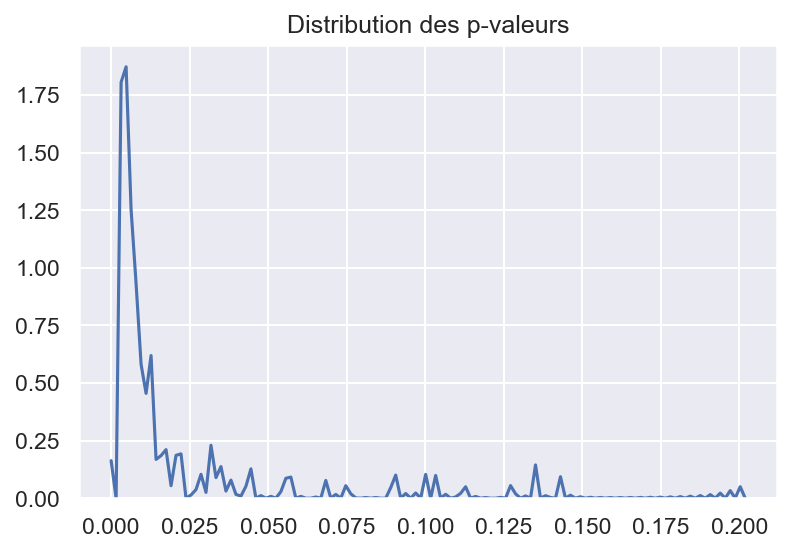

In [66]:
fig, ax  = plt.subplots(dpi=150)
sns.kdeplot(pvaleurs)
plt.title("Distribution des p-valeurs");